In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r'C:\Users\KIIT\Desktop\US_Accidents_March23.csv')

In [14]:
print(df.columns)

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')


In [16]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df = df.dropna(subset=['Start_Time', 'End_Time'])

In [19]:
df['Year'] = df['Start_Time'].dt.year
df['Month'] = df['Start_Time'].dt.month
df['DayOfWeek'] = df['Start_Time'].dt.day_name()
df['Hour'] = df['Start_Time'].dt.hour

In [21]:
weather_conditions = ['Clear', 'Cloudy', 'Rain', 'Snow', 'Fog', 'Other']
df['Weather_Condition'] = df['Weather_Condition'].apply(lambda x: x if x in weather_conditions else 'Other')

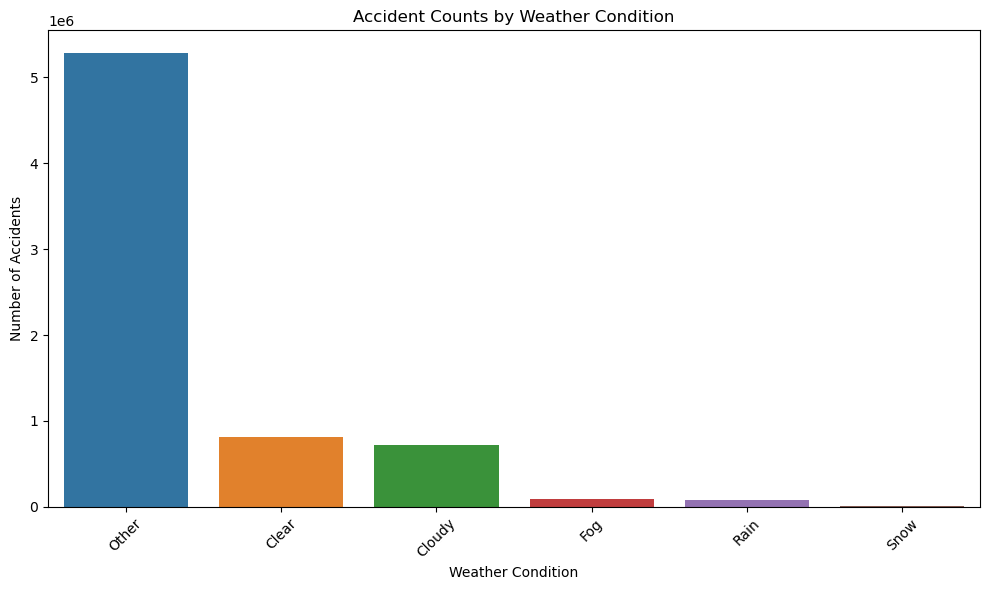

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Weather_Condition', data=df, order=df['Weather_Condition'].value_counts().index)
plt.title('Accident Counts by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\KIIT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


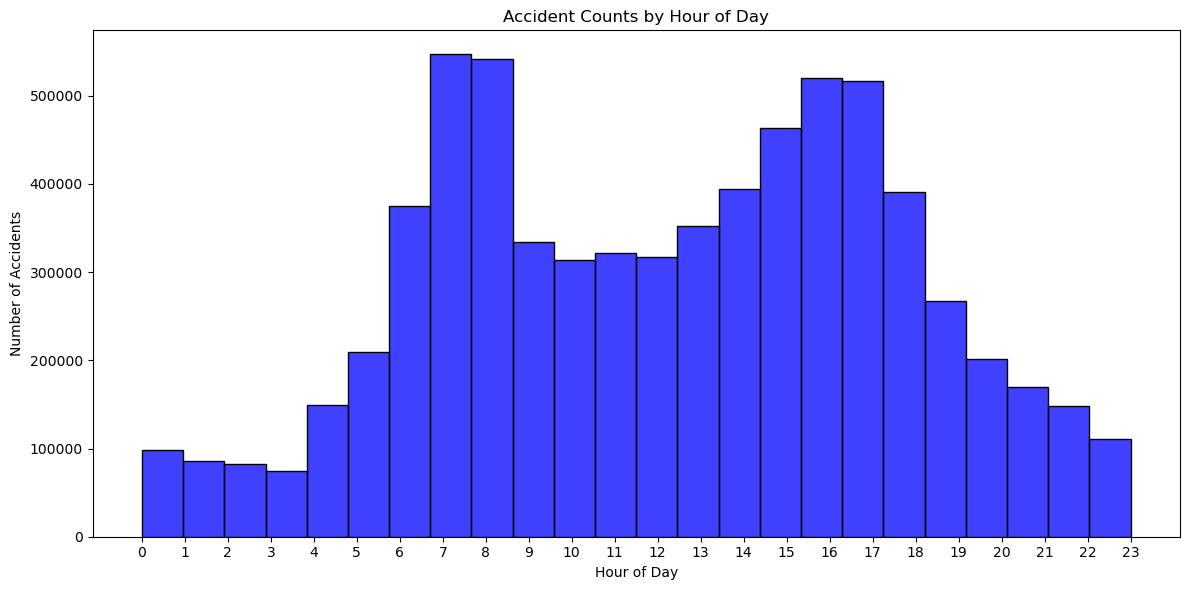

In [31]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Hour'], bins=24, kde=False, color='blue')
plt.title('Accident Counts by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()


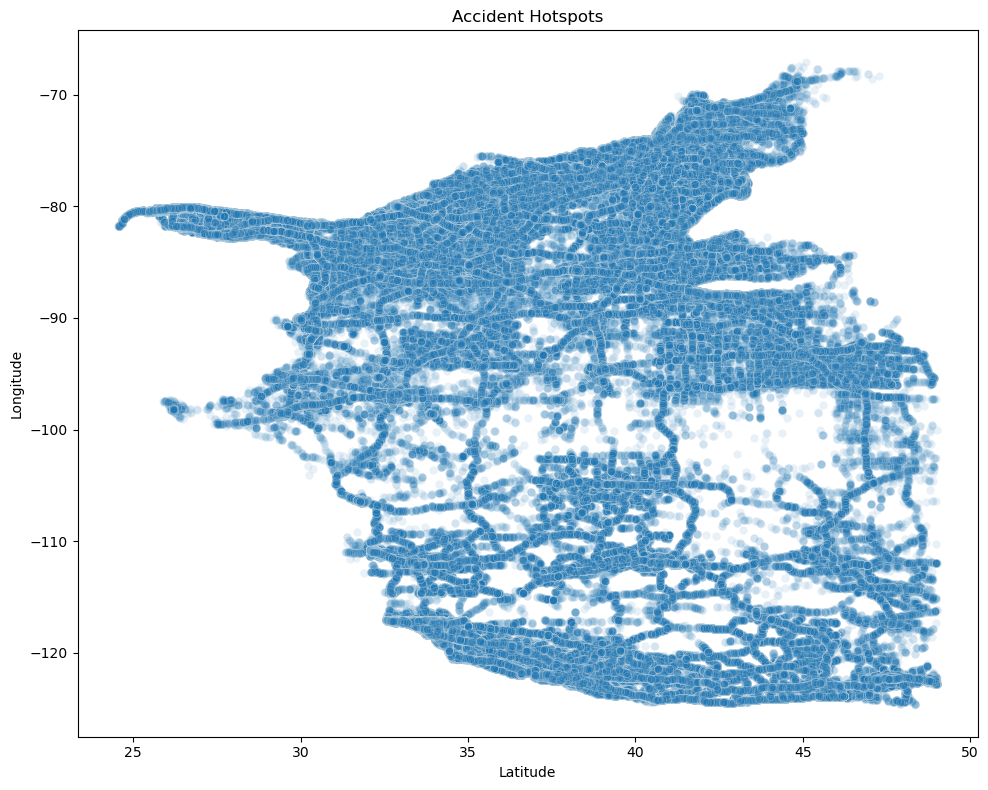

In [34]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Start_Lat', y='Start_Lng', data=df, alpha=0.1)
plt.title('Accident Hotspots')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.tight_layout()
plt.show()

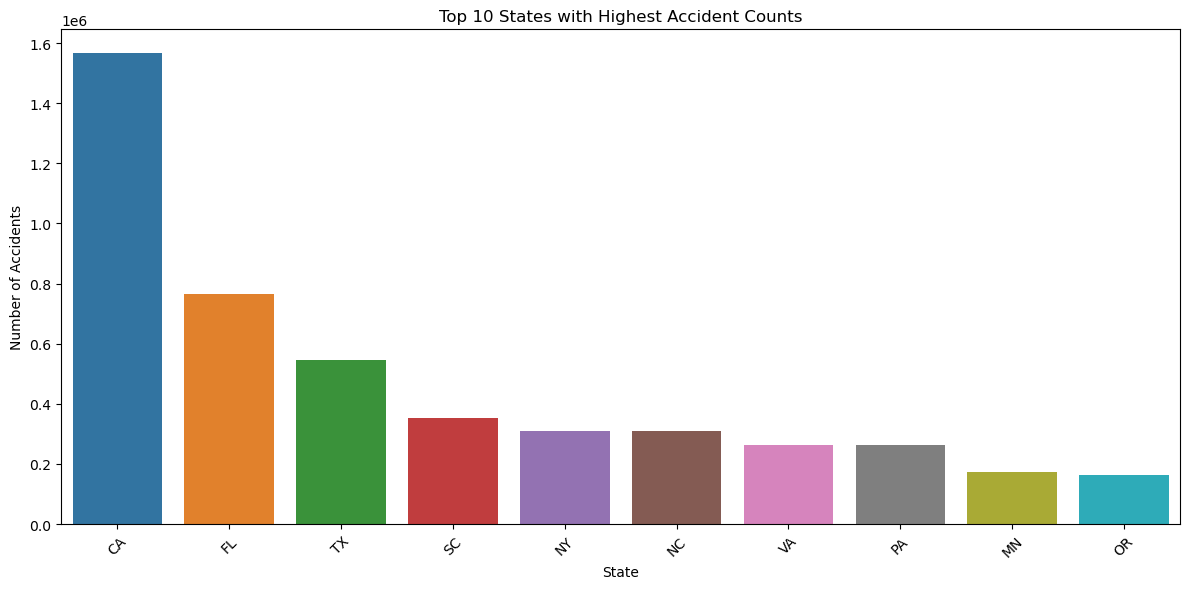

In [36]:
plt.figure(figsize=(12, 6))
sns.countplot(x='State', data=df, order=df['State'].value_counts().index[:10])
plt.title('Top 10 States with Highest Accident Counts')
plt.xlabel('State')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

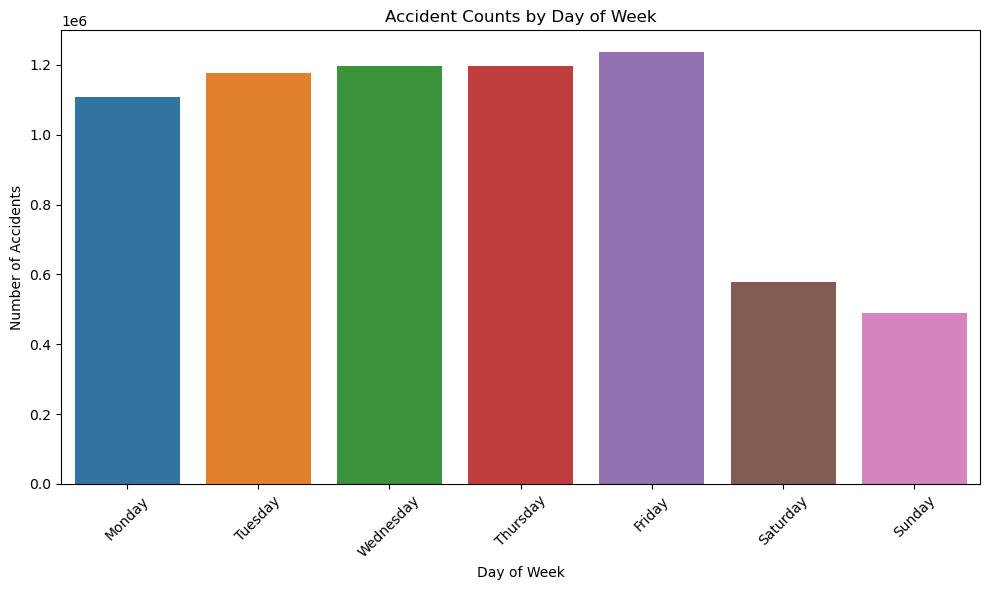

In [38]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(10, 6))
sns.countplot(x='DayOfWeek', data=df, order=day_order)
plt.title('Accident Counts by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()